In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("Appliances_energy_prediction\energydata.csv")   
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (19735, 29)
                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH

In [27]:
# Pre-Processing
# Convert date column into useful features (if exists)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df = df.drop(columns=['date'])

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
hour           0
dayofweek      0
dtype: int64


In [28]:
# Define Features (X) and Target (y)
X = df.drop(columns=['Appliances'])   
y = df['Appliances']                  

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [29]:
# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("\n--- Linear Regression Results ---")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))


--- Linear Regression Results ---
MAE: 52.58981939868861
MSE: 8305.81786125953
R² Score: 0.17000676988064456


In [30]:
# Model 2: Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("\n--- Random Forest Results ---")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))


--- Random Forest Results ---
MAE: 32.29642766658221
MSE: 4603.248061819104
R² Score: 0.5400013831641478


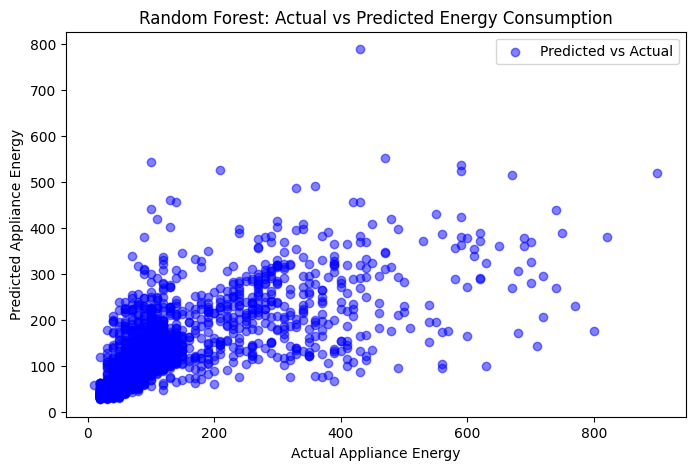

In [31]:
# Visualization
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue", label="Predicted vs Actual")
plt.xlabel("Actual Appliance Energy")
plt.ylabel("Predicted Appliance Energy")
plt.title("Random Forest: Actual vs Predicted Energy Consumption")
plt.legend()
plt.show()


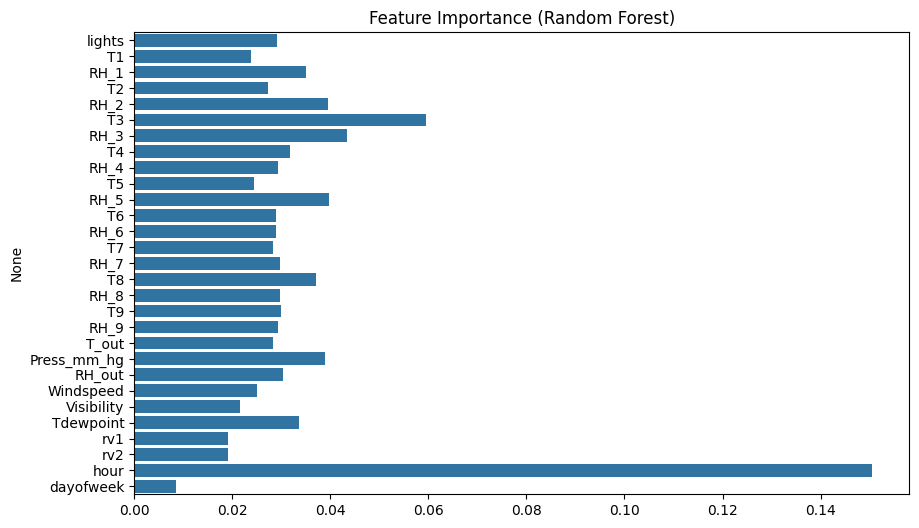

In [32]:
# Feature Importance (for Random Forest)
importances = rf.feature_importances_
features = df.drop(columns=['Appliances']).columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()